In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 10})

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

/srv/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/srv/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

NOTE: THE SHOLE DATASET HAS BEEN FILTERED TO EVERY 20-TH SAMPLE TO MAKE IT POSSIBLE T

In [2]:
X, y = mnist['data'], mnist['target']
sz_mult = 20
X = X[::sz_mult]
y = y[::sz_mult]
print(X.shape)
print(y.shape)

(3500, 784)
(3500,)


In [3]:
y.shape

(3500,)

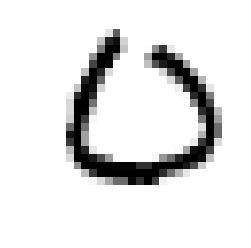

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[int(3500/sz_mult)]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
y[int(3500/sz_mult)]

0.0

In [6]:
train_set_size = int(60000/sz_mult)
X_train, X_test, y_train, y_test = X[:train_set_size], X[train_set_size:], y[:train_set_size], y[train_set_size:]

In [7]:
import numpy as np

shuffle_index = np.random.permutation(train_set_size)
X_train, y_train = X_train[shuffle_index], y[shuffle_index]

In [8]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [9]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
sgd_clf.predict([some_digit])

array([False])

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9631474103585658
0.950950950950951
0.9518555667001003


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.93406593, 0.95      , 0.96196196])

In [13]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.909, 0.913, 0.907])

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[2637,   92],
       [  62,  209]])

In [17]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.6943521594684385

In [18]:
recall_score(y_train_5, y_train_pred)

0.7712177121771218

In [19]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7307692307692308

In [20]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores 

array([-6403180.02213887])

In [21]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred 

array([False])

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method='decision_function')

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

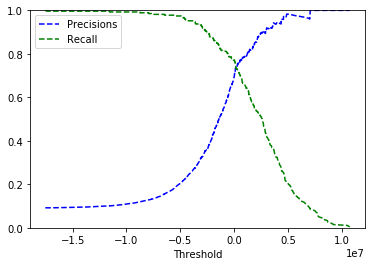

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precisions')   
    plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [25]:
y_train_pred_90 = (y_scores > 70000)

In [26]:
precision_score(y_train_5, y_train_pred_90)

0.71875

In [27]:
recall_score(y_train_5, y_train_pred_90)

0.7638376383763837

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

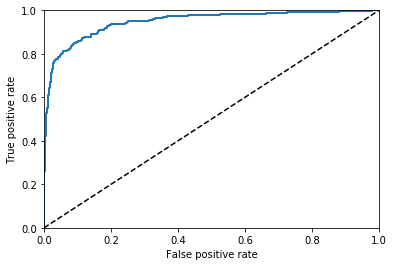

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9475741624400486

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probabs_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                    cv=3, method='predict_proba')
y_scores_forest = y_probabs_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [32]:
roc_auc_score(y_train_5, y_scores_forest)

0.9642171888922992

In [33]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([0.])

In [34]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores 

array([[  3044845.05118974,  -9855226.54028996,  -3550507.40187176,
         -4575643.65063142, -15384622.10735562,  -6403180.02213887,
         -2308313.89474556, -13140077.57431288,  -3136699.89871915,
        -11580555.07149875]])

In [35]:
np.argmax(some_digit_scores)

0

In [36]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [37]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([0.])

In [38]:
len(ovo_clf.estimators_)

45

In [39]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.83366534, 0.81181181, 0.84553661])

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, 
                cv=3, scoring='accuracy')

array([0.87250996, 0.86486486, 0.888666  ])

In [41]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, 
                                y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx 

array([[288,   0,   2,   1,   1,   0,   4,   0,   1,   0],
       [  0, 325,   3,   1,   0,   1,   1,   1,   5,   0],
       [  2,   1, 262,   5,   4,   1,   4,   8,   8,   3],
       [  1,   1,   9, 254,   1,  18,   4,   6,   8,   4],
       [  1,   3,   4,   2, 259,   0,   5,   1,   1,  16],
       [  4,   3,   3,   9,   3, 223,  10,   4,   8,   4],
       [  6,   4,   4,   0,   3,   5, 271,   0,   2,   1],
       [  4,   2,   3,   4,   4,   4,   0, 275,   1,  16],
       [  2,  14,   6,  13,   2,  11,   3,   4, 231,   7],
       [  3,   2,   3,   9,  18,   2,   1,  19,   2, 238]])

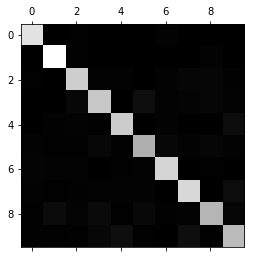

In [42]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

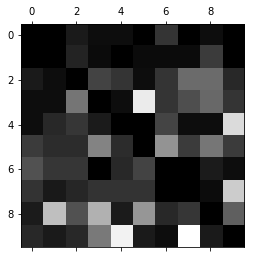

In [43]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

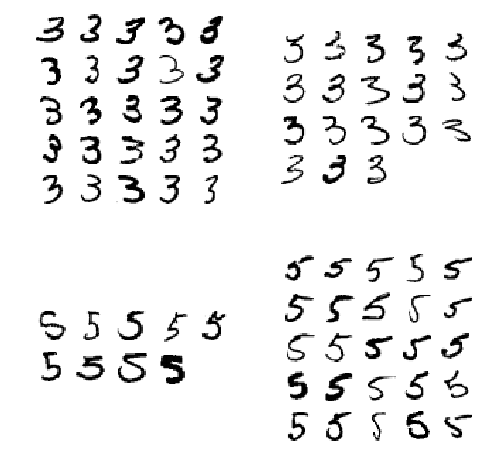

In [44]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [45]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
knn_clf.predict([some_digit])

array([[False, False]])

In [47]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, 
                                     cv=3, verbose=10)
f1_score(y_train, y_train_knn_pred, average='macro')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.7s finished


0.9140314536241657

In [61]:
from numpy.random import randint

noise = randint(1, 100, X_train.shape)
X_train_mod = X_train + noise

noise = randint(1, 100, X_test.shape)
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

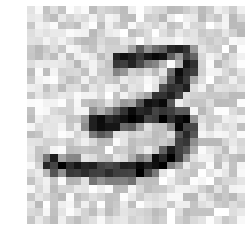

In [62]:
# some_digit = X[int(3500/sz_mult)]
# some_digit_image = some_digit.reshape(28, 28)
plt.imshow(X_train_mod[10].reshape(28,28), 
           cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis('off')
plt.show()

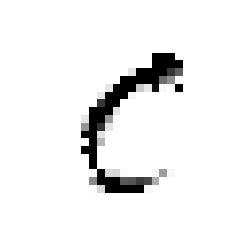

In [66]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[10]])
plot_digits(clean_digit)